# Dataset Description

Two datasets used:
* HuGaDB
* UCI HAR
  

In [1]:
import pandas as pd
from collections import defaultdict
from collections import Counter
import os
import numpy as np
import matplotlib.pyplot as plt

## UCI HAR Dataset

This dataset was gathered from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones). It contains recordings of 30 subjects performing daily activities while carrying a smartphone with embedded accelerometer and gyroscope sensors.

The dataset includes:

* Raw sensor signals from accelerometers and gyroscopes.
* Activity labels (e.g., walking, sitting, standing)
* Subject IDs
* Sensor Features: hundreds of numbers from accelerometer & gyroscope readings (e.g. body acceleration,jerk, angular velocity)

> **Citation**
> Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013). *A Public Domain Dataset for Human Activity Recognition Using Smartphones.* 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning (ESANN), 437–442. \[[Link to dataset](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)]

## UCI-HAR Dataset Processing

The original files are provided as plain `.txt` files. For better handle, we first convert them into a `pandas.DataFrame` object. The dataset authors have already split the data into `train` and `test` sets. Accordingly, we construct two DataFrames: `train_df` and `test_df`. We also combine them into a single unified DataFrame called `uci_df`.


In [2]:
# ==== CONVERTING THE RAW UCI HAR DATASET INTO CLEAN PANDAS DATAFRAMES ====
# The original files are plain .txt files with duplicated feature names.
# This script loads, cleans, labels, and converts them into usable DataFrames.
base = "./Human Activity Recognition using Smartphones/UCI HAR Dataset/"
X_train_path = base + "train/X_train.txt"
y_train_path = base + "train/y_train.txt"
subject_train_path = base + "train/subject_train.txt"
X_test_path = base + "test/X_test.txt"
y_test_path = base + "test/y_test.txt"
subject_test_path = base + "test/subject_test.txt"
features_path = base + "features.txt"
activity_labels_path = base + "activity_labels.txt"

# Load features with deduplication
features_path = "./Human Activity Recognition using Smartphones/UCI HAR Dataset/features.txt"
features_df = pd.read_csv(features_path, sep=r"\s+", header=None)
raw_features = features_df[1].tolist()

# Deduplicate feature names
counts = defaultdict(int)
features = []
for name in raw_features:
    if counts[name]:
        new_name = f"{name}_{counts[name]}"
    else:
        new_name = name
    features.append(new_name)
    counts[name] += 1

# Load datasets
X_train = pd.read_csv(X_train_path, sep=r'\s+', header=None, names=features)
y_train = pd.read_csv(y_train_path, header=None, names=["activity"])
subject_train = pd.read_csv(subject_train_path, header=None, names=["subject"])
X_test = pd.read_csv(X_test_path, sep=r'\s+', header=None, names=features)
y_test = pd.read_csv(y_test_path, header=None, names=["activity"])
subject_test = pd.read_csv(subject_test_path, header=None, names=["subject"])

# Combine
train_df = pd.concat([subject_train, y_train, X_train], axis=1)
test_df = pd.concat([subject_test, y_test, X_test], axis=1)

# Activity label mapping
activity_labels = pd.read_csv(activity_labels_path, sep=r'\s+', header=None, names=["id", "label"])
activity_map = dict(zip(activity_labels.id, activity_labels.label))
train_df["activity"] = train_df["activity"].map(activity_map)
test_df["activity"] = test_df["activity"].map(activity_map)

# Save Dataframes
# cwd = os.getcwd()
# directory = os.path.join(cwd,"UCI HAR Data Frame")
# os.makedirs(directory,exist_ok = True)
# file_name_train = os.path.join(directory,"uci_train.csv")
# file_name_test  = os.path.join(directory,"uci_test.csv")

# train_df.to_csv(file_name_train,index = False)
# test_df.to_csv(file_name_test,index = False)

# == combine train and test ===
uci_df = pd.concat([train_df,test_df])

## First look into UCI-HAR Dataset

In the table below, each **row** corresponds to a subject performing an activity during a short time window. The sensor features in each row are **pre-computed** summary statistics extracted from the raw acceleremoter and gyroscope signals. For example, `tBodyAcc-mean()-X` represents the **mean body acceleration** in the **X direction** over that time window.

* are some of the features dependent
* linear regression -- features should be independent
* Check correlation: PCA >> dimension reduction.
* Neural networks? perhaps after regression--one step more complicated. may lose interpretation.

* to add value: feature extraction.. which features matter more... logistic regression. 

In [3]:
uci_df

,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,WALKING_UPSTAIRS,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,WALKING_UPSTAIRS,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,WALKING_UPSTAIRS,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,24,WALKING_UPSTAIRS,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


Ece's idea:
Plot the x,y,z mean in $\mathbb{R}^3$.

In [4]:
uci_df.loc[uci_df["activity"] == "WALKING_DOWNSTAIRS"].iloc[:,:30]

,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3"
125,1,WALKING_DOWNSTAIRS,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,...,-0.834069,-0.340356,-0.459360,-0.314061,0.350572,0.352557,0.219442,-0.293143,0.229463,-0.114497
126,1,WALKING_DOWNSTAIRS,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,...,-0.792795,-0.171736,-0.408845,-0.233500,0.232528,0.208928,0.184642,-0.444155,0.432129,-0.378888
127,1,WALKING_DOWNSTAIRS,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,...,-0.804396,-0.338478,-0.448079,-0.267649,0.148147,0.285629,0.115345,-0.455942,0.498215,-0.520628
128,1,WALKING_DOWNSTAIRS,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,...,-0.798732,-0.458567,-0.504047,-0.311712,0.041265,0.347778,0.100114,-0.593795,0.647289,-0.612513
129,1,WALKING_DOWNSTAIRS,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,...,-0.734145,-0.418059,-0.459400,-0.159690,0.064052,0.479778,0.172848,-0.412399,0.383346,-0.374085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,24,WALKING_DOWNSTAIRS,0.126970,-0.013276,-0.073441,-0.173816,0.041540,-0.342513,-0.253156,-0.093578,...,-0.801193,-0.494928,-0.412755,-0.437978,0.003499,0.410555,0.278420,-0.199527,0.026454,-0.124623
2933,24,WALKING_DOWNSTAIRS,0.363943,-0.022212,-0.125437,-0.041180,0.020777,-0.243607,-0.113519,-0.120400,...,-0.740478,-0.312726,-0.431783,-0.222970,0.229327,0.419643,0.103491,-0.324680,0.189807,-0.260292
2934,24,WALKING_DOWNSTAIRS,0.331044,-0.063979,-0.117333,-0.068002,0.156431,-0.317060,-0.148922,0.070107,...,-0.787701,-0.348812,-0.315366,-0.292389,0.241342,0.327022,0.205895,-0.428173,0.254360,-0.175205
2935,24,WALKING_DOWNSTAIRS,0.272259,-0.007579,-0.072642,-0.072559,0.005472,-0.225400,-0.161118,-0.074187,...,-0.726684,-0.361879,-0.418596,-0.372787,0.232528,0.430431,0.440731,-0.402143,0.254169,-0.142523


In [5]:
uci_df.loc[uci_df["activity"] == 'WALKING_UPSTAIRS']

,subject,activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
150,1,WALKING_UPSTAIRS,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,...,-0.006607,-0.331470,-0.685946,0.198799,-0.515058,-0.960808,0.798595,-0.730180,0.275743,0.075790
151,1,WALKING_UPSTAIRS,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,...,0.059841,-0.230811,-0.621552,-0.183312,-0.366714,-0.932361,0.257390,-0.695481,0.303214,0.065482
152,1,WALKING_UPSTAIRS,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,...,0.042175,-0.596753,-0.881817,-0.140795,-0.235431,-0.904871,-0.524824,-0.681620,0.311837,0.070519
153,1,WALKING_UPSTAIRS,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,...,0.035729,-0.544209,-0.834194,-0.099332,-0.413970,-0.968821,-0.132384,-0.686715,0.308243,0.070468
154,1,WALKING_UPSTAIRS,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,...,-0.208251,-0.476294,-0.862534,0.360594,0.455744,0.777628,-0.057846,-0.693267,0.306133,0.058967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,WALKING_UPSTAIRS,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,WALKING_UPSTAIRS,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,WALKING_UPSTAIRS,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,24,WALKING_UPSTAIRS,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [6]:
# compute some stat
number_of_subjects = len(uci_df["subject"].unique()) 
activities = uci_df["activity"].unique()
number_of_activities = len(activities) # different types of activities
number_of_sensor_features = 561

# == display ===
print("📊 Dataset Summary")
print("="*40)
print(f"👤 Number of unique subjects        : {number_of_subjects}")
print(f"🏃 Number of distinct activities    : {number_of_activities}")
print(f"📈 Number of sensor features        : {number_of_sensor_features}")
print()
print("🧭 Activities:")
print(", ".join(activities))



📊 Dataset Summary
👤 Number of unique subjects        : 30
🏃 Number of distinct activities    : 6
📈 Number of sensor features        : 561

🧭 Activities:
STANDING, SITTING, LAYING, WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS


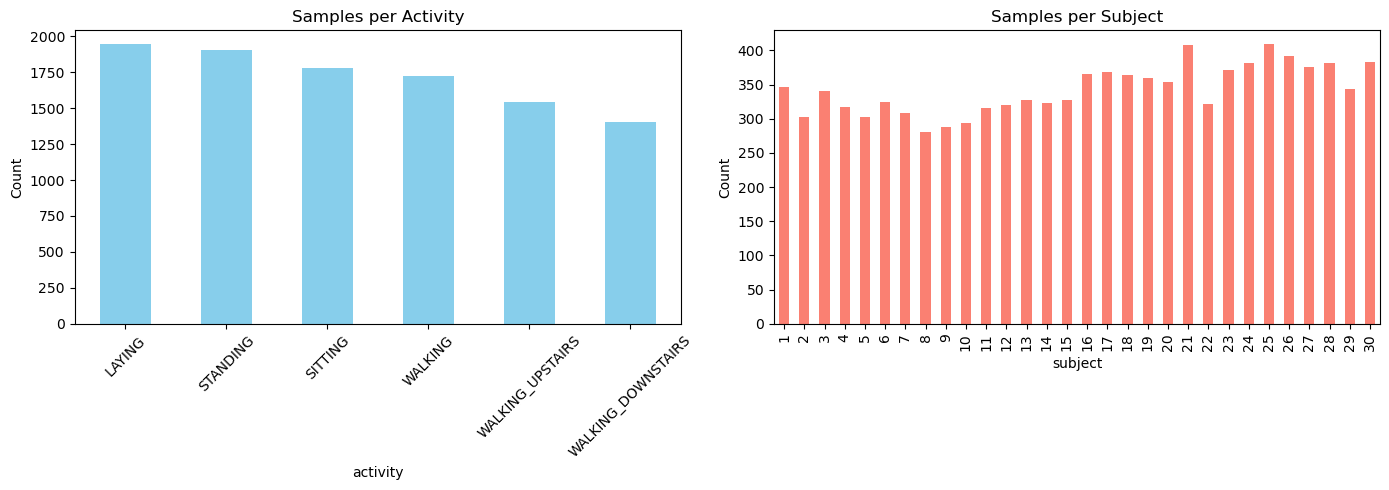

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot 1: Samples per Activity
uci_df["activity"].value_counts().plot(
    kind='bar',
    ax=axes[0],
    title="Samples per Activity",
    color="skyblue"
)
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Samples per Subject
uci_df["subject"].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1],
    title="Samples per Subject",
    color="salmon"
)
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## HuGADB

# Problem Statement

The overall goal of this project is to better understand and classify various types of human activity using smartphone sensor data. Potential applications include:

1. Detecting subtle changes in gait or coordination as early warning signs of neurological or mobility‐related disorders, helping physical therapists monitor and support patient recovery.
2. Differentiating between intentional and accidental movements to flag abnormal motion patterns—e.g., falls or mobility impairments.

Here are some questions of interest:

* Given a feature vector of sensor summaries, can we predict which activity it comes from?
* How can we compare two different activities—i.e. define a notion of distance between their feature vectors?
* Within one activity class, can we spot outliers? For example, an MDS plot of all WALKING samples might reveal anomalous gait samples.
* Do simple methods work—such as classifying by nearest neighbor under the $\ell_2$ distance—or do we need more advanced ML (decision trees, random forests)?
* Finally, how do more sophisticated approaches like TDA or metric–measure–based methods compare against both the naive $\ell_2$ baseline and traditional ML techniques?

**Three-layer approach**

1. **Naive distance methods**: start with simple $\ell_2$ distances and k-NN to see if raw feature vectors already separate activities.
2. **Classic ML**: apply off-the-shelf classifiers (decision trees, random forests, SVMs).
3. **TDA / geometric / probabilistic methods**: Explore persistent homology, or some other geometric approach. Perhaps even some sort of probabilistic approach.
  


# Stakeholders

* **Healthcare professionals** (physical therapists, neurologists) who need early indicators of motor impairments
* **Patients & at-risk individuals** whose gait or balance is being monitored
* **Rehabilitation centers & clinics** deploying motion-analysis tools
* **Wearable device manufacturers** integrating activity-recognition algorithms



# KPIs

* **Overall classification accuracy** 
* **Confusion Matrix** 



# Next Step

* Jun 6 Written Proposal of modelin approach & EDA
* Jun 13 Preliminary Results: Results with visualizations. Successes and pitfalls.
* Jun 20 Clean repository.
* Jun 27 Deadline to submit project.

* One hot encoding for labels: one column for each label and 1s for when the data is that activity otherwise 0.

## PLAN For Next Week
1. Understand what features mean --make sure numerics make sense. Decide on data.
2. Try Naive approaches -- Try PCA, logistic regression, check correlation. 